# Neural Network for Agarwood Prediction

## Import Dependencies

In [2]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras import optimizers
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, r2_score

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [4]:
tf.random.set_seed(13)
tf.debugging.set_log_device_placement(False)

## Data PreProcessing

In [5]:
df = pd.read_csv("agarwood dataset.csv")

In [6]:
df.head()

,PlantNo,Width,Age,Temperature,Rain expected in 2 weeks,SoilType,WhiteRoots,PestAttacks,FloweringSeason,Result
0,No1,25,7,29,No,Red-Yellow,No,No,No,Ready for inoculation
1,No2,19,7,29,No,Red-Yellow,No,No,No,Ready for inoculation
2,No3,22,6,30,No,Red-Yellow,No,No,No,Ready for inoculation
3,No4,20,8,28,No,Red-Yellow,No,No,No,Ready for inoculation
4,No5,18,6,30,No,Red-Yellow,No,No,No,Ready for inoculation


In [7]:
df.shape

(1499, 10)

In [8]:
df.isnull().sum()

PlantNo                     0
Width                       0
Age                         0
Temperature                 0
Rain expected in 2 weeks    0
SoilType                    0
WhiteRoots                  0
PestAttacks                 0
FloweringSeason             0
Result                      0
dtype: int64

In [9]:
df['SoilType'].value_counts()

Red-Yellow        954
Reddish-Brown     493
Noncalic-Brown     52
Name: SoilType, dtype: int64

In [10]:
df['Result'].value_counts()

Disease infected.Wait until the tree recovers            401
Ready for inoculation                                    361
Not ready for inoculation. Tree is not matured enough    250
Not ready for inoculation .Width is not enough           249
Ready for inoculation. Harvest might be affected         238
Name: Result, dtype: int64

In [11]:
# Preprocessing on PlantNo
df['PlantNo'] = df['PlantNo'].str.replace('No','')
df['PlantNo'] = df['PlantNo'].astype(np.int64)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   PlantNo                   1499 non-null   int64 
 1   Width                     1499 non-null   int64 
 2   Age                       1499 non-null   int64 
 3   Temperature               1499 non-null   int64 
 4   Rain expected in 2 weeks  1499 non-null   object
 5   SoilType                  1499 non-null   object
 6   WhiteRoots                1499 non-null   object
 7   PestAttacks               1499 non-null   object
 8   FloweringSeason           1499 non-null   object
 9   Result                    1499 non-null   object
dtypes: int64(4), object(6)
memory usage: 117.2+ KB


In [13]:
# converting boolean values into binary
df['Rain expected in 2 weeks'] = [1 if typ == "Yes" else 0 for typ in df['Rain expected in 2 weeks']]
df['WhiteRoots'] = [1 if typ == "Yes" else 0 for typ in df['WhiteRoots']]
df['PestAttacks'] = [1 if typ == "Yes" else 0 for typ in df['PestAttacks']]
df['FloweringSeason'] = [1 if typ == "Yes" else 0 for typ in df['FloweringSeason']]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   PlantNo                   1499 non-null   int64 
 1   Width                     1499 non-null   int64 
 2   Age                       1499 non-null   int64 
 3   Temperature               1499 non-null   int64 
 4   Rain expected in 2 weeks  1499 non-null   int64 
 5   SoilType                  1499 non-null   object
 6   WhiteRoots                1499 non-null   int64 
 7   PestAttacks               1499 non-null   int64 
 8   FloweringSeason           1499 non-null   int64 
 9   Result                    1499 non-null   object
dtypes: int64(8), object(2)
memory usage: 117.2+ KB


In [15]:
df.head()

,PlantNo,Width,Age,Temperature,Rain expected in 2 weeks,SoilType,WhiteRoots,PestAttacks,FloweringSeason,Result
0,1,25,7,29,0,Red-Yellow,0,0,0,Ready for inoculation
1,2,19,7,29,0,Red-Yellow,0,0,0,Ready for inoculation
2,3,22,6,30,0,Red-Yellow,0,0,0,Ready for inoculation
3,4,20,8,28,0,Red-Yellow,0,0,0,Ready for inoculation
4,5,18,6,30,0,Red-Yellow,0,0,0,Ready for inoculation


In [16]:
# Preprocessing on Soil Type
def preproc_soilType(df):
    if df == "Red-Yellow":
        return 0
    elif df == "Reddish-Brown":
        return 1
    elif df == "Noncalic-Brown":
        return 2
    else:
        return 3

In [17]:
# Preprocessing on Result >> Converting into binary
def preproc_result(df):
    if df == "Ready for inoculation" or df == "Ready for inoculation. Harvest might be affected":
        return 1
    else:
        return 0

In [18]:
# applying preprocessing
df['SoilType'] = df['SoilType'].apply(preproc_soilType)
df['Result'] = df['Result'].apply(preproc_result)

In [19]:
df.head()

,PlantNo,Width,Age,Temperature,Rain expected in 2 weeks,SoilType,WhiteRoots,PestAttacks,FloweringSeason,Result
0,1,25,7,29,0,0,0,0,0,1
1,2,19,7,29,0,0,0,0,0,1
2,3,22,6,30,0,0,0,0,0,1
3,4,20,8,28,0,0,0,0,0,1
4,5,18,6,30,0,0,0,0,0,1


#### Data Visualization

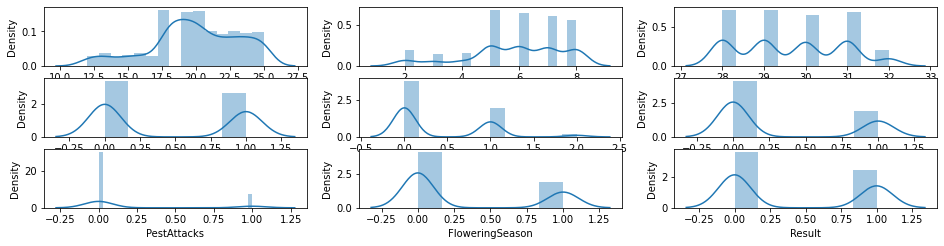

In [20]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(4,3,1)
sns.distplot(df['Width'])
plt.subplot(4,3,2)
sns.distplot(df['Age'])
plt.subplot(4,3,3)
sns.distplot(df['Temperature'])
plt.subplot(4,3,4)
sns.distplot(df['Rain expected in 2 weeks'])
plt.subplot(4,3,5)
sns.distplot(df['SoilType'])
plt.subplot(4,3,6)
sns.distplot(df['WhiteRoots'])
plt.subplot(4,3,7)
sns.distplot(df['PestAttacks'])
plt.subplot(4,3,8)
sns.distplot(df['FloweringSeason'])
plt.subplot(4,3,9)
sns.distplot(df['Result'])
plt.show()

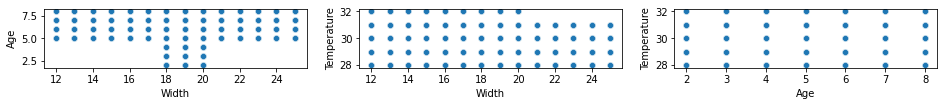

In [21]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(4,3,1)
sns.scatterplot(x=df['Width'], y=df['Age'])
plt.subplot(4,3,2)
sns.scatterplot(x=df['Width'], y=df['Temperature'])
plt.subplot(4,3,3)
sns.scatterplot(x=df['Age'], y=df['Temperature'])
plt.show()

In [22]:
df = df.drop(columns =['PlantNo'])

In [23]:
df.corr()['Width']

Width                       1.000000
Age                         0.112614
Temperature                -0.170737
Rain expected in 2 weeks    0.015475
SoilType                   -0.064971
WhiteRoots                  0.248900
PestAttacks                 0.098987
FloweringSeason             0.343959
Result                      0.393261
Name: Width, dtype: float64

<AxesSubplot:>

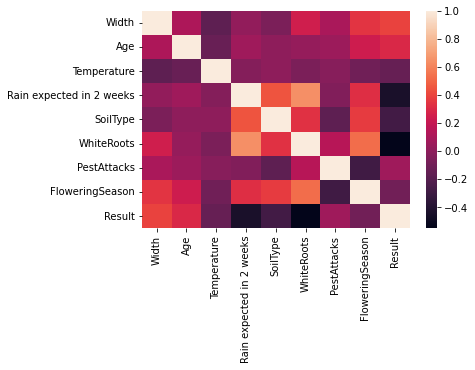

In [24]:
sns.heatmap(df.corr())

### Preparing Dataset for training

In [25]:
train_dataset, temp_test_dataset = train_test_split(df, test_size=0.3)

train_dataset.shape, temp_test_dataset.shape

((1049, 9), (450, 9))

In [26]:
test_dataset, val_dataset = train_test_split(temp_test_dataset, test_size=0.5)

test_dataset.shape, val_dataset.shape

((225, 9), (225, 9))

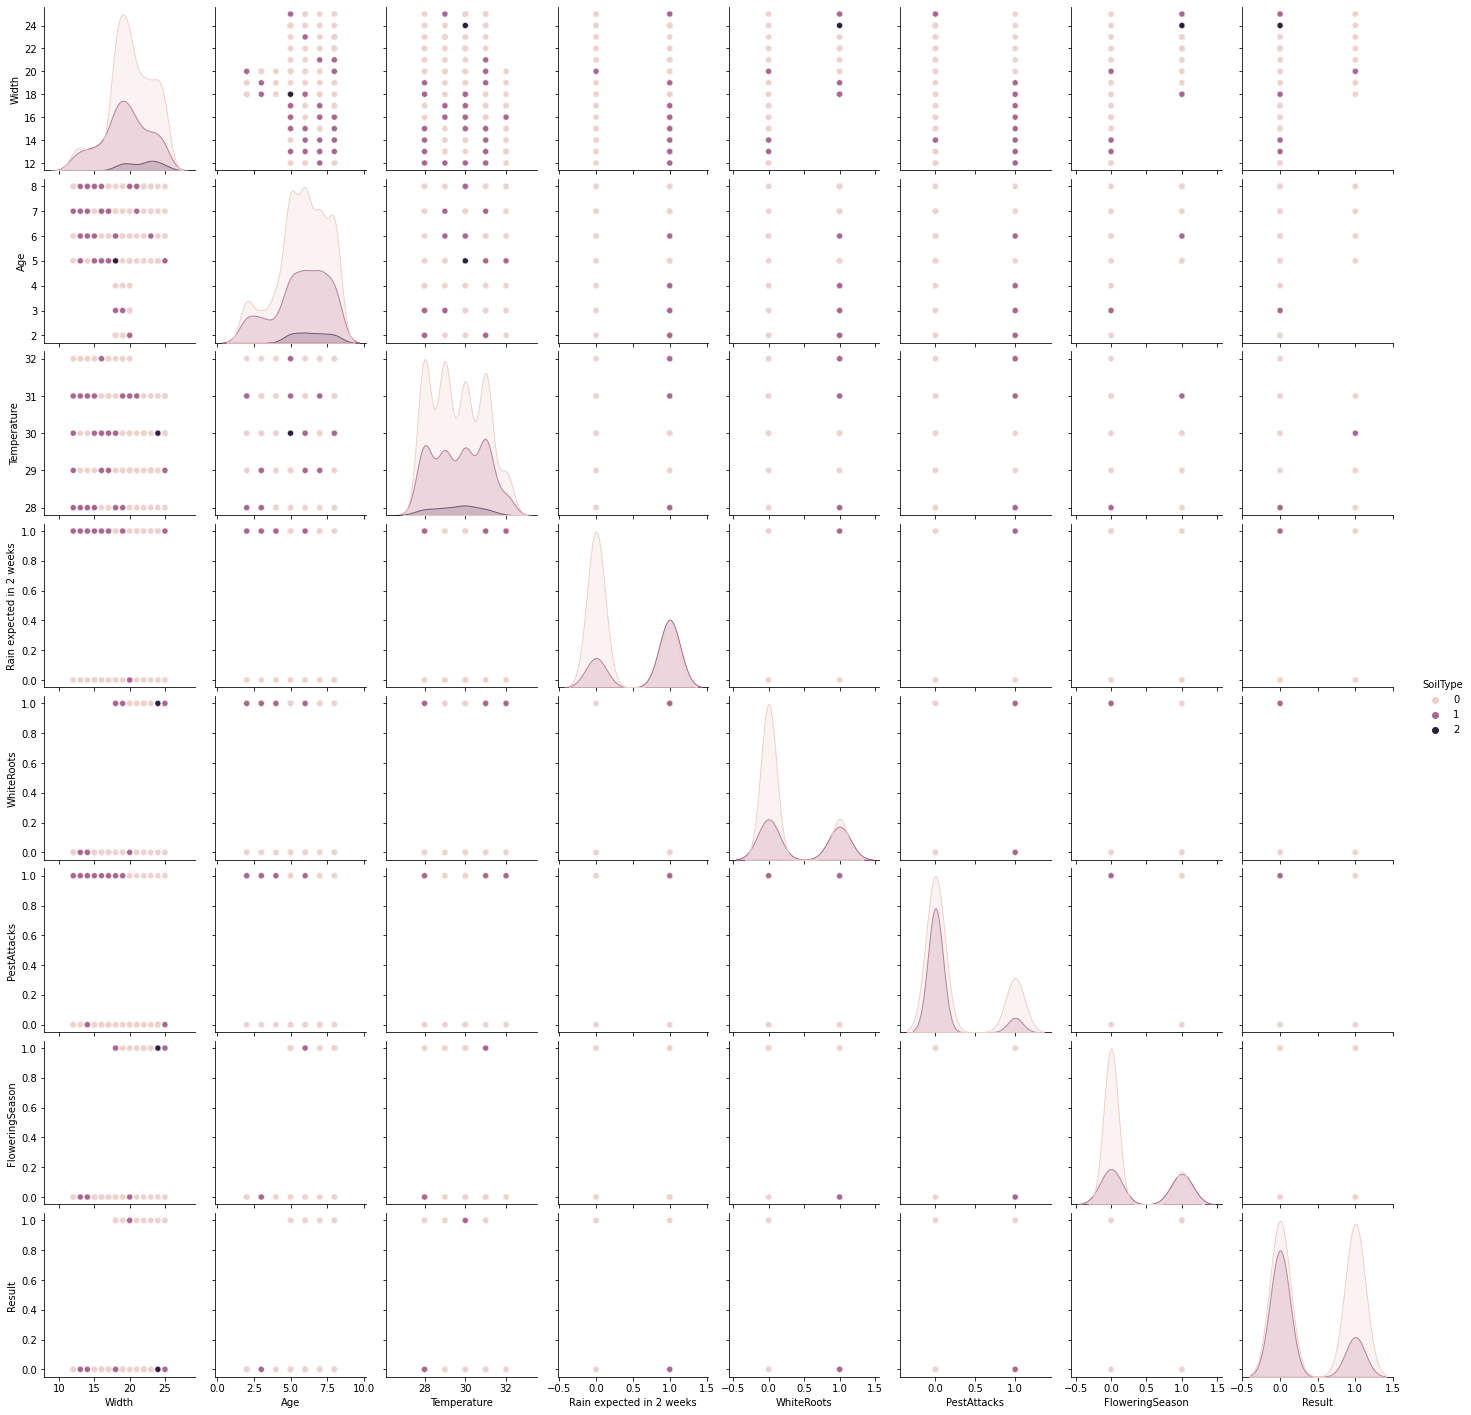

In [27]:
#plot the relationship between each two variables to spot anything incorrect
train_stats = train_dataset.describe()
train_stats.pop("Result")
sns.pairplot(train_dataset, hue="SoilType")

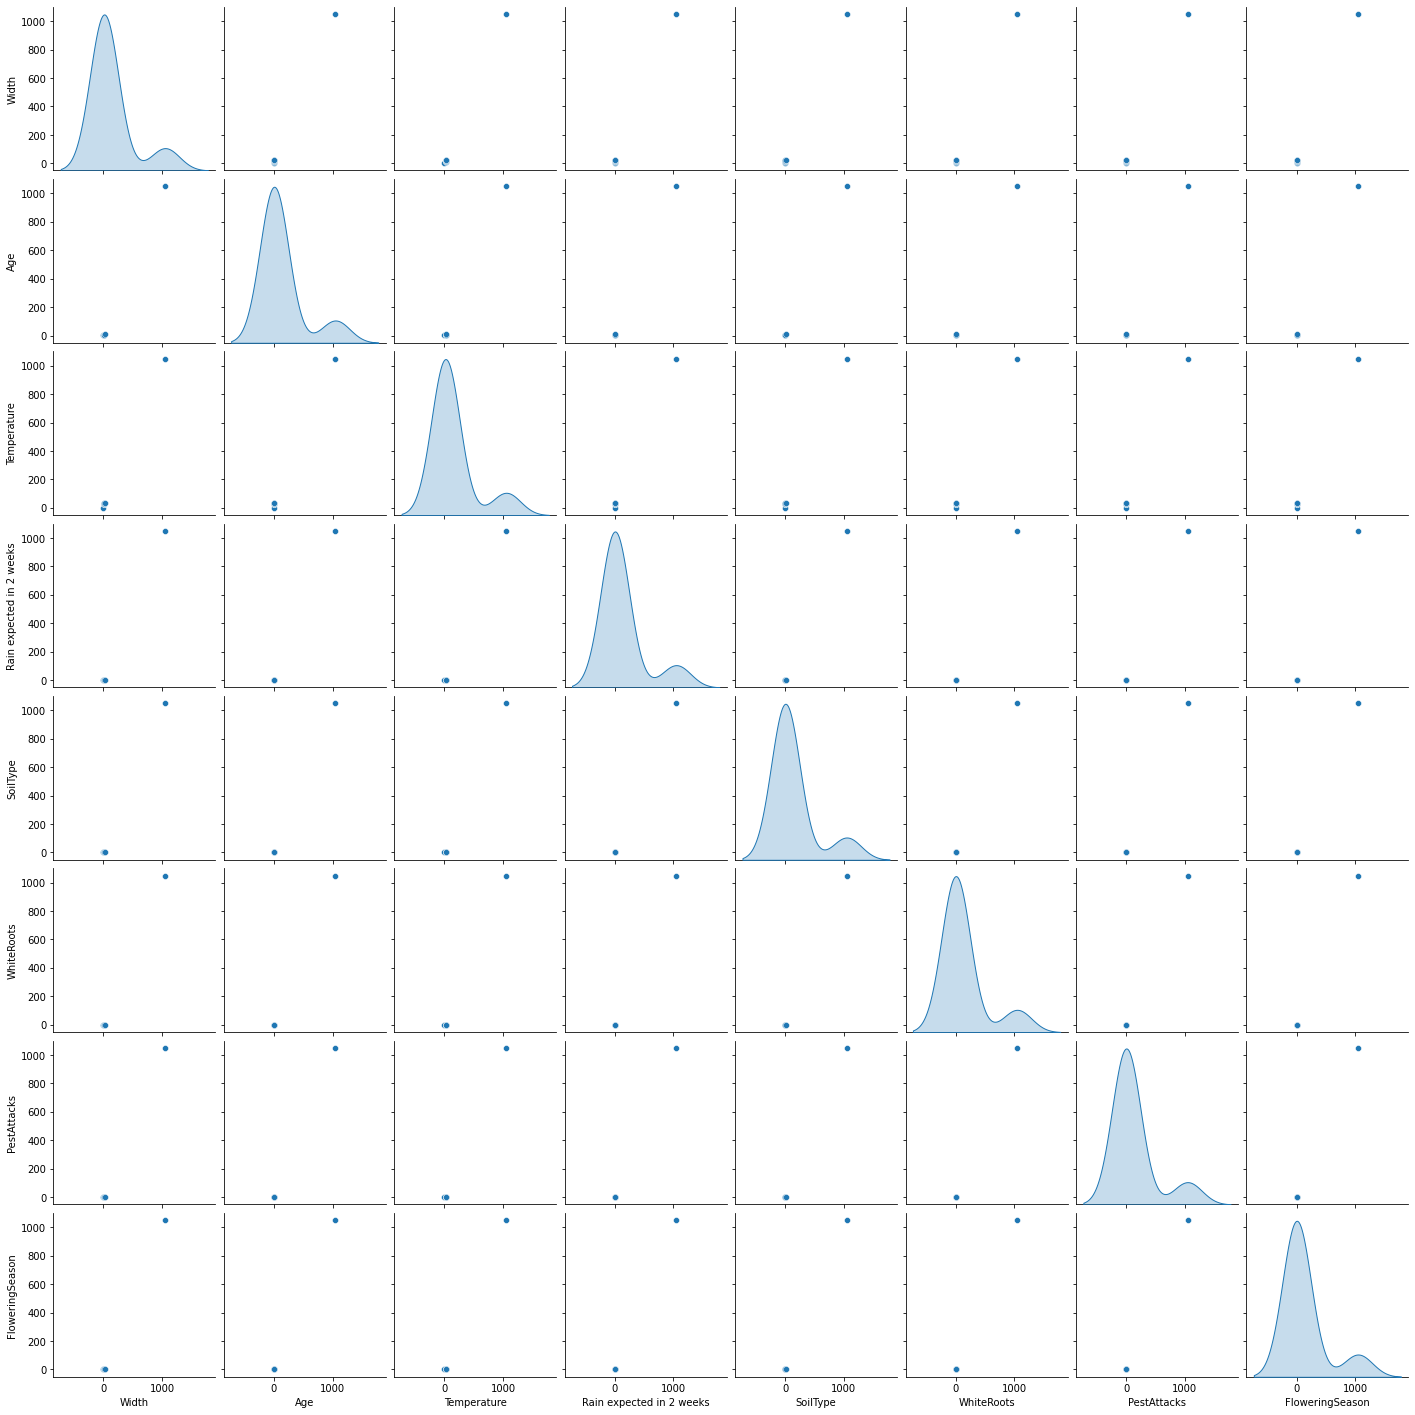

In [28]:
sns.pairplot(train_stats[train_stats.columns], diag_kind='kde')

In [29]:
train_stats = train_dataset.describe()
train_stats.pop("Result")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Width,1049.0,19.933270,3.224034,12.0,18.0,20.0,22.0,25.0
Age,1049.0,5.806482,1.717033,2.0,5.0,6.0,7.0,8.0
Temperature,1049.0,29.643470,1.258808,28.0,29.0,30.0,31.0,32.0
Rain expected in 2 weeks,1049.0,0.444233,0.497117,0.0,0.0,0.0,1.0,1.0
SoilType,1049.0,0.403241,0.559809,0.0,0.0,0.0,1.0,2.0
WhiteRoots,1049.0,0.316492,0.465329,0.0,0.0,0.0,1.0,1.0
PestAttacks,1049.0,0.197331,0.398174,0.0,0.0,0.0,0.0,1.0
FloweringSeason,1049.0,0.300286,0.458601,0.0,0.0,0.0,1.0,1.0


In [30]:
# saving data labels
train_labels = train_dataset.pop("Result")
test_labels = test_dataset.pop("Result")
val_labels = val_dataset.pop("Result")

## Data Normalization/Scaling

In [31]:
def norm(x):
    
    return (x - train_stats['mean'])/train_stats['std']

train_data_norm = norm(train_dataset)
test_data_norm = norm(test_dataset)
val_data_norm = norm(val_dataset)

# train_data_norm = train_dataset
# test_data_norm = test_dataset
# val_data_norm = val_dataset

In [32]:
train_data_norm.shape, test_data_norm.shape, val_data_norm.shape

((1049, 8), (225, 8), (225, 8))

In [33]:
train_labels.shape, test_labels.shape, val_labels.shape

((1049,), (225,), (225,))

In [34]:
train_data_norm.head()

,Width,Age,Temperature,Rain expected in 2 weeks,SoilType,WhiteRoots,PestAttacks,FloweringSeason
726,-0.599643,0.112705,0.283228,1.117980,1.066004,1.468870,-0.495589,1.525758
721,0.641039,0.112705,0.283228,1.117980,1.066004,1.468870,-0.495589,1.525758
1402,-0.289473,-2.216895,-0.511174,-0.893617,1.066004,-0.680146,-0.495589,-0.654787
901,0.641039,0.112705,-0.511174,1.117980,-0.720319,1.468870,-0.495589,1.525758
500,0.951209,0.695105,-1.305577,1.117980,-0.720319,-0.680146,-0.495589,-0.654787


## Model Building

In [35]:
def build_classification_model():
    model = Sequential()
    
    model.add(Dense(9, input_dim=8, activation = 'relu')) #to calculate from dataset
    
    model.add(Dense(27, activation = 'relu'))
    
    model.add(Dense(18, activation = 'relu'))
    
    model.add(Dense(18, activation = 'relu'))
    
    model.add(Dense(1, activation = 'sigmoid'))
    
    return model

In [36]:
model = build_classification_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 81        
                                                                 
 dense_1 (Dense)             (None, 27)                270       
                                                                 
 dense_2 (Dense)             (None, 18)                504       
                                                                 
 dense_3 (Dense)             (None, 18)                342       
                                                                 
 dense_4 (Dense)             (None, 1)                 19        
                                                                 
Total params: 1,216
Trainable params: 1,216
Non-trainable params: 0
_________________________________________________________________


In [37]:
learning_rate = 0.001
optimizer = optimizers.SGD(learning_rate)
model.compile(
    optimizer= optimizer, 
    loss=keras.losses.BinaryCrossentropy(from_logits=True), 
    metrics= ['accuracy'])

### Model Checkpoints

In [38]:
#check point
mc = ModelCheckpoint(filepath="Agarwood_model_bestModel.h5",
                     monitor='accuracy',
                     min_delta=0,
                     patience=5,
                     verbose=1,
                     save_best_only=True)

### Model Training

In [39]:
EPOCHS = 200
batch_size = 32

history = model.fit(
    train_data_norm,
    train_labels,
    epochs=EPOCHS,
    batch_size=batch_size,
    callbacks=mc,
    verbose=1,
    shuffle=True,
    steps_per_epoch = int(train_data_norm.shape[0]/ batch_size),
    validation_data = (val_data_norm, val_labels),
)

Epoch 1/200
24/32 [=====================>........] - ETA: 0s - loss: 0.6676 - accuracy: 0.5130
Epoch 1: accuracy improved from -inf to 0.51953, saving model to Agarwood_model_bestModel.h5
32/32 [==============================] - 2s 36ms/step - loss: 0.6670 - accuracy: 0.5195 - val_loss: 0.6705 - val_accuracy: 0.4844
Epoch 2/200
21/32 [==================>...........] - ETA: 0s - loss: 0.6593 - accuracy: 0.5429
Epoch 2: accuracy improved from 0.51953 to 0.54277, saving model to Agarwood_model_bestModel.h5
32/32 [==============================] - 0s 8ms/step - loss: 0.6623 - accuracy: 0.5428 - val_loss: 0.6670 - val_accuracy: 0.4933
Epoch 3/200
32/32 [==============================] - ETA: 0s - loss: 0.6592 - accuracy: 0.5526
Epoch 3: accuracy improved from 0.54277 to 0.55261, saving model to Agarwood_model_bestModel.h5
32/32 [==============================] - 0s 9ms/step - loss: 0.6592 - accuracy: 0.5526 - val_loss: 0.6637 - val_accuracy: 0.5022
Epoch 4/200
29/32 [=======================

Epoch 59/200
29/32 [==========================>...] - ETA: 0s - loss: 0.5350 - accuracy: 0.6243
Epoch 59: accuracy did not improve from 0.63127
32/32 [==============================] - 1s 16ms/step - loss: 0.5339 - accuracy: 0.6234 - val_loss: 0.5401 - val_accuracy: 0.5956
Epoch 60/200
29/32 [==========================>...] - ETA: 0s - loss: 0.5360 - accuracy: 0.6221
Epoch 60: accuracy did not improve from 0.63127
32/32 [==============================] - 1s 17ms/step - loss: 0.5336 - accuracy: 0.6273 - val_loss: 0.5383 - val_accuracy: 0.5956
Epoch 61/200
29/32 [==========================>...] - ETA: 0s - loss: 0.5367 - accuracy: 0.6113
Epoch 61: accuracy did not improve from 0.63127
32/32 [==============================] - 1s 16ms/step - loss: 0.5302 - accuracy: 0.6214 - val_loss: 0.5365 - val_accuracy: 0.5911
Epoch 62/200
29/32 [==========================>...] - ETA: 0s - loss: 0.5394 - accuracy: 0.6048
Epoch 62: accuracy did not improve from 0.63127
32/32 [===========================

32/32 [==============================] - 1s 17ms/step - loss: 0.4428 - accuracy: 0.8043 - val_loss: 0.4487 - val_accuracy: 0.8178
Epoch 115/200
29/32 [==========================>...] - ETA: 0s - loss: 0.4408 - accuracy: 0.8339
Epoch 115: accuracy improved from 0.81711 to 0.82989, saving model to Agarwood_model_bestModel.h5
32/32 [==============================] - 1s 17ms/step - loss: 0.4401 - accuracy: 0.8299 - val_loss: 0.4470 - val_accuracy: 0.8178
Epoch 116/200
29/32 [==========================>...] - ETA: 0s - loss: 0.4373 - accuracy: 0.8198
Epoch 116: accuracy did not improve from 0.82989
32/32 [==============================] - 1s 16ms/step - loss: 0.4462 - accuracy: 0.8161 - val_loss: 0.4455 - val_accuracy: 0.8178
Epoch 117/200
29/32 [==========================>...] - ETA: 0s - loss: 0.4310 - accuracy: 0.8230
Epoch 117: accuracy did not improve from 0.82989
32/32 [==============================] - 1s 16ms/step - loss: 0.4344 - accuracy: 0.8201 - val_loss: 0.4440 - val_accuracy: 

32/32 [==============================] - 1s 19ms/step - loss: 0.3413 - accuracy: 0.8879 - val_loss: 0.3612 - val_accuracy: 0.8756
Epoch 173/200
29/32 [==========================>...] - ETA: 0s - loss: 0.3541 - accuracy: 0.8806
Epoch 173: accuracy did not improve from 0.88791
32/32 [==============================] - 1s 16ms/step - loss: 0.3519 - accuracy: 0.8810 - val_loss: 0.3596 - val_accuracy: 0.8756
Epoch 174/200
29/32 [==========================>...] - ETA: 0s - loss: 0.3381 - accuracy: 0.8969
Epoch 174: accuracy improved from 0.88791 to 0.89577, saving model to Agarwood_model_bestModel.h5
32/32 [==============================] - 1s 17ms/step - loss: 0.3409 - accuracy: 0.8958 - val_loss: 0.3581 - val_accuracy: 0.8756
Epoch 175/200
30/32 [===========================>..] - ETA: 0s - loss: 0.3391 - accuracy: 0.8867
Epoch 175: accuracy did not improve from 0.89577
32/32 [==============================] - 1s 18ms/step - loss: 0.3412 - accuracy: 0.8850 - val_loss: 0.3565 - val_accuracy: 

## Save Model

In [40]:
model.save('Agarwood_model.h5')

## Performance Visualization

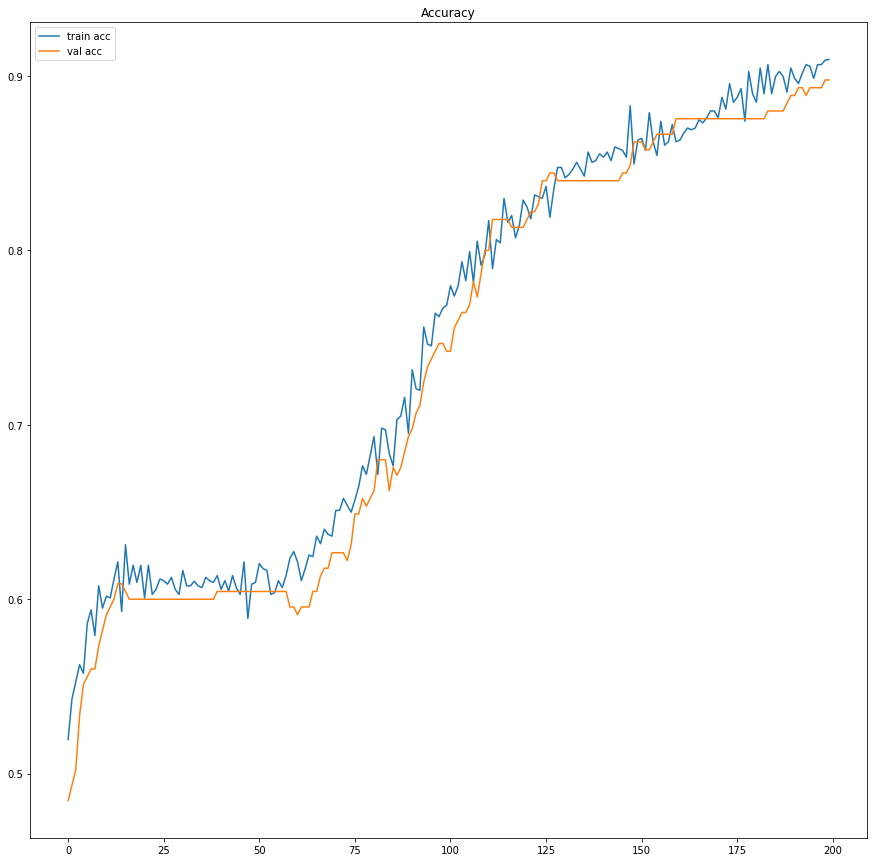

In [41]:
plt.figure(figsize = (15,15))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

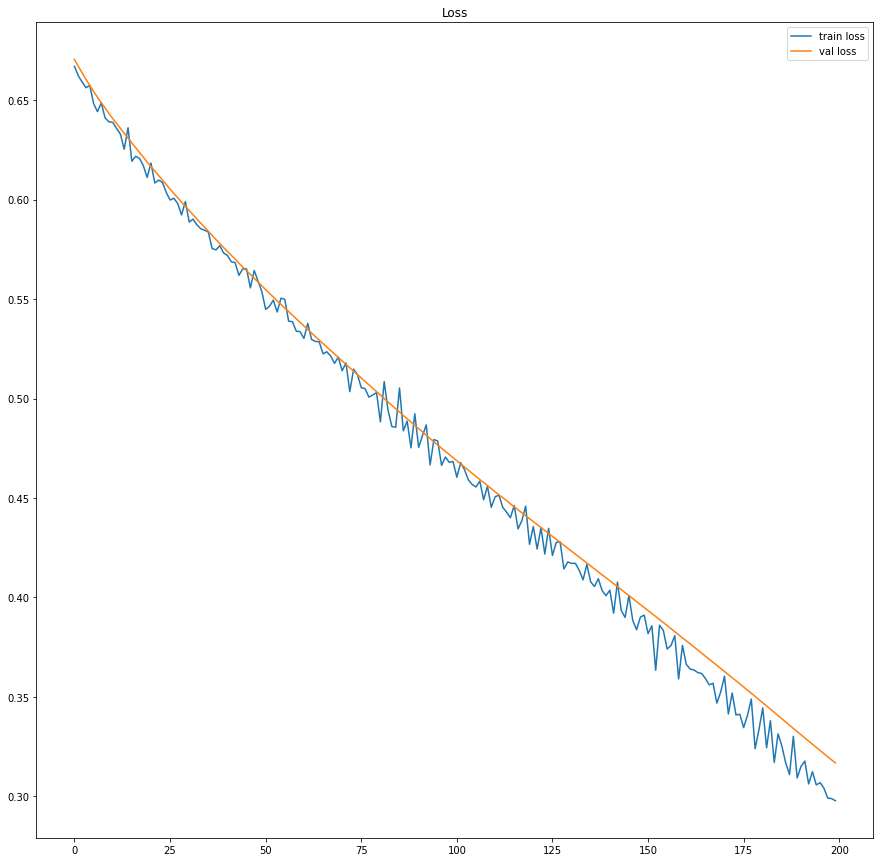

In [42]:
plt.figure(figsize = (15,15))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

## Load Model

In [43]:
Agarwood_model = load_model('Agarwood_model_bestModel.h5')

## Model Evaluation

In [44]:
print("Train Split: ")
loss, accuracy = Agarwood_model.evaluate(train_data_norm, train_labels, verbose=1)
print("Accuracy: {:5.2f}".format(accuracy))
print("Loss: {:5.2f}".format(loss))

Train Split: 
33/33 [==============================] - 1s 14ms/step - loss: 0.2970 - accuracy: 0.9085
Accuracy:  0.91
Loss:  0.30


In [45]:
print("Test Split: ")
loss, accuracy = Agarwood_model.evaluate(test_data_norm, test_labels, verbose=1)
print("Accuracy: {:5.2f}".format(accuracy))
print("Loss: {:5.2f}".format(loss))

Test Split: 
8/8 [==============================] - 0s 9ms/step - loss: 0.3141 - accuracy: 0.8978
Accuracy:  0.90
Loss:  0.31


In [46]:
print("Validation Split: ")
loss, accuracy = Agarwood_model.evaluate(val_data_norm, val_labels, verbose=1)
print("Accuracy: {:5.2f}".format(accuracy))
print("Loss: {:5.2f}".format(loss))

Validation Split: 
8/8 [==============================] - 0s 8ms/step - loss: 0.3167 - accuracy: 0.8978
Accuracy:  0.90
Loss:  0.32


In [47]:
Agarwood_model.evaluate(test_data_norm, test_labels, batch_size=32)

8/8 [==============================] - 0s 9ms/step - loss: 0.3141 - accuracy: 0.8978


[0.31410178542137146, 0.897777795791626]

### Confusion Matrix

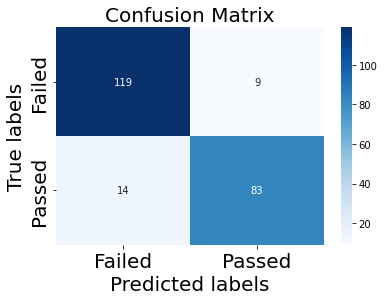

<Figure size 720x576 with 0 Axes>

In [48]:
ax = plt.subplot()
predict_results = Agarwood_model.predict(test_data_norm)

predict_results = (predict_results > 0.5)

cm = confusion_matrix(test_labels, predict_results)

plt.figure(figsize=(10,8))

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax);

#labels, titles and ticks
ax.set_xlabel('Predicted labels', fontsize=20);
ax.set_ylabel('True labels', fontsize=20);
ax.set_title('Confusion Matrix', fontsize=20);
ax.xaxis.set_ticklabels(['Failed', 'Passed'], fontsize=20);
ax.yaxis.set_ticklabels(['Failed', 'Passed'], fontsize=20);

In [49]:
test_labels.value_counts()

0    128
1     97
Name: Result, dtype: int64

### Classification Report

In [50]:
print(classification_report(predict_results, test_labels))

              precision    recall  f1-score   support

       False       0.93      0.89      0.91       133
        True       0.86      0.90      0.88        92

    accuracy                           0.90       225
   macro avg       0.89      0.90      0.90       225
weighted avg       0.90      0.90      0.90       225



In [51]:
r2 = r2_score(predict_results, test_labels)
f1 = f1_score(predict_results, test_labels)

In [52]:
print("R2 Score: {r2}".format(r2=r2))
print("F1 Score: {f1}".format(f1=f1))

R2 Score: 0.5770676691729324
F1 Score: 0.8783068783068784


## Making Predictions

In [53]:
test_data_norm.columns.unique()

Index(['Width', 'Age', 'Temperature', 'Rain expected in 2 weeks', 'SoilType',
       'WhiteRoots', 'PestAttacks', 'FloweringSeason'],
      dtype='object')

In [64]:
def prediction(arr):
    scalar = MinMaxScaler()
    scalar.fit(train_dataset)
    arr = [arr]
    arr = scalar.transform(arr)
    data = pd.DataFrame(arr, columns =['1', '2', '3', '4', '5', '6', '7', '8'])
    results = Agarwood_model.predict(data)
    print("Prediction by model: {pred}".format(pred=results))
#     pred_class = (Agarwood_model.predict(data) > 0.5).astype("int32")
    pred_class = 1 if results > 0.5 else 0
    print(pred_class)

In [99]:
arr = [25, 8, 32, 0, 2, 0, 0, 0]
prediction(arr)

Prediction by model: [[0.23546237]]
0


## Model Summary

*   Model Name : Sequential Deep Neural Network
*   Training Accuracy : 91%
*   Testing Accuracy : 89.78%
*   Validation Accuracy : 89.78%
*   Training Loss : 0.2970
*   Testing loss : 0.3141
*   Validation losss : 0.3167
*   R2 Score : 0.5770
*   F1 Score : 0.8783
*   Best Performing Class : 0
*   Worst performing class : 1